# **Analisis Sentimen dan Prediksi Sentimen Crypto**

# Labeling Data

# Open Data dari Google Drive

In [4]:
import numpy
import keras.models
import tensorflow
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df= pd.read_csv('/content/drive/MyDrive/ML Dataset For Portfolio/sentiment_data_2.csv')

In [ ]:
df

,content,sentiment
0,"aplikasi apaan nh, udah jelek aplikasi nya mal...",very negative
1,mudah dan bagus,positive
2,peraktis gampang di pake pokonya top,positive
3,"mau daftar lagi aja susah banget, pesan SMS se...",negative
4,jangan kebanyakan update,positive
...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banya...,very positive
14996,Akhirnya keluar juga,very positive
14997,Ayo lengkapin lagi fiturnya,very positive
14998,Lebih gampang kelola rekening,very positive


In [ ]:
df.shape

(15000, 2)

In [ ]:
df.sentiment.value_counts()

,count
sentiment,
very negative,6865
very positive,4405
neutral,1427
negative,1305
positive,998


<Axes: xlabel='sentiment', ylabel='count'>

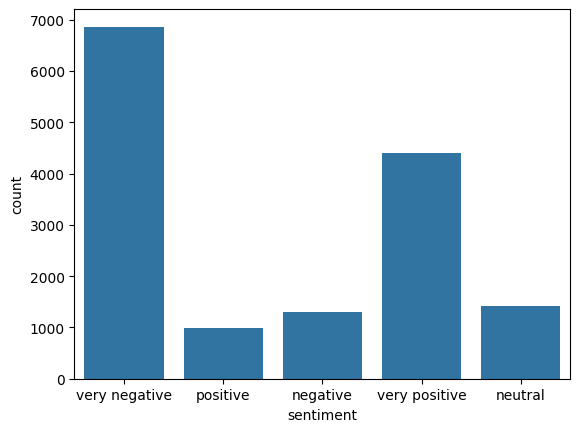

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='sentiment', data=df)

# **Preprocessing**

# Preprocessing Tahap 0

In [5]:
#Import
import tweepy
import json
import csv
import re
import string
import random
import nltk
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [6]:
#From
from time import time
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from matplotlib.patches import Patch
from sklearn import metrics
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, ComplementNB, BernoulliNB
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import make_pipeline
from wordcloud import WordCloud
from wordcloud import WordCloud,ImageColorGenerator

In [ ]:
# cleansing data
df
def regex_func(dataTw):
    dataRegex = []
    for datax in range(0, len(dataTw)):
        regex = dataTw.iloc[datax, 0]
        regex = re.sub(r'http\S+', '', regex)
        regex = re.sub('@[^\s]+', '', regex)
        regex = re.sub(r'#[^\s]+', '', regex)
        regex = regex.encode("ascii", "ignore")
        regex = regex.decode()
        regex = re.sub('\s+',' ', regex)
        mark_list_word = regex.split()
        if len(mark_list_word) > 10:
            dataRegex.append(regex)
    return dataRegex

In [ ]:
Data1_reg = regex_func(df)
Data1_reg

['aplikasi apaan nh, udah jelek aplikasi nya malah di pelihara, pas mau klik malah kembali ke setelan awal.',
 'mau daftar lagi aja susah banget, pesan SMS selalu gagal gak tau kenapa bisa seperti itu.',
 'Aplikasinya bagus sih tapi aku gasuka setiap transaksi pasti ada pesannya di email. Gimana caranya supaya setiap ada transaksi tidak usah masuk di email?',
 'Fiturnya lengkap dan secara user experience sudah cukup baik. Tinggal optimalisasi sistem dan penambahan fitur pendukung lain yang bisa lebih membantu ketika memeriksa atau melakukan transaksi.',
 'Lebih keren lagi jika didalam aplikasi ada fitur Livechat atau Chat WA dengan Agent Contact Center Halo BCA.',
 'saya pemakai baru 3 bln,awalnya tiap bln kena admin 10 rb,bln kedua ada saldo sekitar 14rb tdk masuk,dan bln ke 3 jg iya ada transaksi masuk 14rb gak masuk ke saldo pdhl tiap tgl 14 kena cas 10rb,,jd total 2 x transaksi dari merchane ke my bca gak masuk,,,',
 'saya mencoba TF ke BCA ternyata tidak masuk ke rek hanya laporan

In [ ]:
df.to_csv("pre0.csv", index = False)

# Preprocessing Tahap 1

In [ ]:
import re
def removeSpecialChar(tweet):
    tweet = tweet.replace('\\t'," ").replace('\\n'," ").replace("\\u"," ").replace("\\"," ").replace("_","").replace(".","")
    tweet = tweet.encode('ascii','replace').decode('ascii')
    tweet = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ",tweet).split())
    tweet = tweet.replace("http://"," ").replace("http://"," ")
    return tweet

In [ ]:
df['tweet_clean_1'] = df['content'].apply(lambda x : removeSpecialChar(x))
df

,content,sentiment,tweet_clean_1
0,"aplikasi apaan nh, udah jelek aplikasi nya mal...",very negative,"aplikasi apaan nh, udah jelek aplikasi nya mal..."
1,mudah dan bagus,positive,mudah dan bagus
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top
3,"mau daftar lagi aja susah banget, pesan SMS se...",negative,"mau daftar lagi aja susah banget, pesan SMS se..."
4,jangan kebanyakan update,positive,jangan kebanyakan update
...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banya...,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak...
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening


In [ ]:
import string
def removePunctuation(tweet):
    tweet = tweet.translate(str.maketrans("","",string.punctuation))
    return tweet

In [ ]:
df['tweet_clean_1'] = df['tweet_clean_1'].apply(lambda x : removePunctuation(x))
df

,content,sentiment,tweet_clean_1
0,"aplikasi apaan nh, udah jelek aplikasi nya mal...",very negative,aplikasi apaan nh udah jelek aplikasi nya mala...
1,mudah dan bagus,positive,mudah dan bagus
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top
3,"mau daftar lagi aja susah banget, pesan SMS se...",negative,mau daftar lagi aja susah banget pesan SMS sel...
4,jangan kebanyakan update,positive,jangan kebanyakan update
...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banya...,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak...
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening


In [ ]:
# Remove Emoticon
def removeEmoticons(tweet):
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

In [ ]:
df['tweet_clean_1'] = df['tweet_clean_1'].apply(lambda x : removeEmoticons(x))
df

,content,sentiment,tweet_clean_1
0,"aplikasi apaan nh, udah jelek aplikasi nya mal...",very negative,aplikasi apaan nh udah jelek aplikasi nya mala...
1,mudah dan bagus,positive,mudah dan bagus
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top
3,"mau daftar lagi aja susah banget, pesan SMS se...",negative,mau daftar lagi aja susah banget pesan SMS sel...
4,jangan kebanyakan update,positive,jangan kebanyakan update
...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banya...,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak...
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening


In [ ]:
#Remover Single Char
def removeSingleChr(tweet):
  # menggunakan regex.function()
  tweet = re.sub(r"\b[a-zA-Z]\b","",tweet)
  # /b word boundary digunakakan untuk  memfilter huruf yang hanya terdiri dari satu karakter
  # setiap huruf akan di cek apakah setelah huruf tersebut terdapat spasi atau tidak
  #\b backspace batas word , contoh \bA\b
  return tweet

In [ ]:
df['tweet_clean_1'] = df['tweet_clean_1'].apply(lambda x : removeSingleChr(x))
df

,content,sentiment,tweet_clean_1
0,"aplikasi apaan nh, udah jelek aplikasi nya mal...",very negative,aplikasi apaan nh udah jelek aplikasi nya mala...
1,mudah dan bagus,positive,mudah dan bagus
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top
3,"mau daftar lagi aja susah banget, pesan SMS se...",negative,mau daftar lagi aja susah banget pesan SMS sel...
4,jangan kebanyakan update,positive,jangan kebanyakan update
...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banya...,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak...
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening


In [ ]:
def removeNum(tweet):
    return re.sub(r"\d+","",tweet)

In [ ]:
df['tweet_clean_1'] =df['tweet_clean_1'].apply(lambda x : removeNum(x))
df

,content,sentiment,tweet_clean_1
0,"aplikasi apaan nh, udah jelek aplikasi nya mal...",very negative,aplikasi apaan nh udah jelek aplikasi nya mala...
1,mudah dan bagus,positive,mudah dan bagus
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top
3,"mau daftar lagi aja susah banget, pesan SMS se...",negative,mau daftar lagi aja susah banget pesan SMS sel...
4,jangan kebanyakan update,positive,jangan kebanyakan update
...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banya...,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak...
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening


In [ ]:
df.dropna(subset=['tweet_clean_1'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [ ]:
df

,content,sentiment,tweet_clean_1
0,"aplikasi apaan nh, udah jelek aplikasi nya mal...",very negative,aplikasi apaan nh udah jelek aplikasi nya mala...
1,mudah dan bagus,positive,mudah dan bagus
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top
3,"mau daftar lagi aja susah banget, pesan SMS se...",negative,mau daftar lagi aja susah banget pesan SMS sel...
4,jangan kebanyakan update,positive,jangan kebanyakan update
...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banya...,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak...
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening


In [ ]:
df.to_csv('pre1.csv' , index = False)

# Preprocesing Tahap 2

In [7]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
import nltk


In [ ]:
nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
#Melakukan Tokenize
df['tweet_tokenize_2'] = df['tweet_clean_1'].apply(lambda x : word_tokenize(x))

In [ ]:
pd.set_option('display.max_colwidth', 180)
df.head(5)

,content,sentiment,tweet_clean_1,tweet_tokenize_2
0,"aplikasi apaan nh, udah jelek aplikasi nya malah di pelihara, pas mau klik malah kembali ke setelan awal.",very negative,aplikasi apaan nh udah jelek aplikasi nya malah di pelihara pas mau klik malah kembali ke setelan awal,"[aplikasi, apaan, nh, udah, jelek, aplikasi, nya, malah, di, pelihara, pas, mau, klik, malah, kembali, ke, setelan, awal]"
1,mudah dan bagus,positive,mudah dan bagus,"[mudah, dan, bagus]"
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top,"[peraktis, gampang, di, pake, pokonya, top]"
3,"mau daftar lagi aja susah banget, pesan SMS selalu gagal gak tau kenapa bisa seperti itu.",negative,mau daftar lagi aja susah banget pesan SMS selalu gagal gak tau kenapa bisa seperti itu,"[mau, daftar, lagi, aja, susah, banget, pesan, SMS, selalu, gagal, gak, tau, kenapa, bisa, seperti, itu]"
4,jangan kebanyakan update,positive,jangan kebanyakan update,"[jangan, kebanyakan, update]"


In [ ]:
norm = pd.read_csv('/content/pre1.csv')

In [ ]:
#Melakukan normalisasi Pada kata kebentuk Dasar
normalized_tweet_docx = norm

normalized_tweet_dict={}
for index , row in normalized_tweet_docx.iterrows():
    if row[0].strip() not in normalized_tweet_dict :
    #jika kata x dalam doct tweet tidak berada di dict tweet maka
        normalized_tweet_dict[row[0].strip()] = row[1].strip()
    # dict tweeet kata x pada row 0 docx tweet = row 1 pada docx tweet

def normalizedTerm(tweet):
  #mengakses key , dan mengembalikan value
  return [normalized_tweet_dict[term] if term in normalized_tweet_dict else term for term in tweet]
  #kembalikan bentuk normalisasi dari kata x jika kata x berada dalam dict tweet ,  namun jika tidak kembalikan kata x teresebut

<ipython-input-40-4a193e055ce3>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if row[0].strip() not in normalized_tweet_dict :
<ipython-input-40-4a193e055ce3>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  normalized_tweet_dict[row[0].strip()] = row[1].strip()


In [ ]:
df['normalized_stem_1'] = df['tweet_tokenize_2'].apply(lambda x : normalizedTerm(x))
df

,content,sentiment,tweet_clean_1,tweet_tokenize_2,normalized_stem_1
0,"aplikasi apaan nh, udah jelek aplikasi nya malah di pelihara, pas mau klik malah kembali ke setelan awal.",very negative,aplikasi apaan nh udah jelek aplikasi nya malah di pelihara pas mau klik malah kembali ke setelan awal,"[aplikasi, apaan, nh, udah, jelek, aplikasi, nya, malah, di, pelihara, pas, mau, klik, malah, kembali, ke, setelan, awal]","[aplikasi, apaan, nh, udah, jelek, aplikasi, nya, malah, di, pelihara, pas, mau, klik, malah, kembali, ke, setelan, awal]"
1,mudah dan bagus,positive,mudah dan bagus,"[mudah, dan, bagus]","[mudah, dan, bagus]"
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top,"[peraktis, gampang, di, pake, pokonya, top]","[peraktis, gampang, di, pake, pokonya, top]"
3,"mau daftar lagi aja susah banget, pesan SMS selalu gagal gak tau kenapa bisa seperti itu.",negative,mau daftar lagi aja susah banget pesan SMS selalu gagal gak tau kenapa bisa seperti itu,"[mau, daftar, lagi, aja, susah, banget, pesan, SMS, selalu, gagal, gak, tau, kenapa, bisa, seperti, itu]","[mau, daftar, lagi, aja, susah, banget, pesan, SMS, selalu, gagal, gak, tau, kenapa, bisa, seperti, itu]"
4,jangan kebanyakan update,positive,jangan kebanyakan update,"[jangan, kebanyakan, update]","[jangan, kebanyakan, update]"
...,...,...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banyak rekening sangat membantu,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak rekening sangat membantu,"[Kerenn, bgt, aplikasinya, Fitur, bisa, akses, banyak, rekening, sangat, membantu]","[Kerenn, bgt, aplikasinya, Fitur, bisa, akses, banyak, rekening, sangat, membantu]"
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga,"[Akhirnya, keluar, juga]","[Akhirnya, keluar, juga]"
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya,"[Ayo, lengkapin, lagi, fiturnya]","[Ayo, lengkapin, lagi, fiturnya]"
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening,"[Lebih, gampang, kelola, rekening]","[Lebih, gampang, kelola, rekening]"


In [ ]:
df.head(5)

,content,sentiment,tweet_clean_1,tweet_tokenize_2,normalized_stem_1
0,"aplikasi apaan nh, udah jelek aplikasi nya malah di pelihara, pas mau klik malah kembali ke setelan awal.",very negative,aplikasi apaan nh udah jelek aplikasi nya malah di pelihara pas mau klik malah kembali ke setelan awal,"[aplikasi, apaan, nh, udah, jelek, aplikasi, nya, malah, di, pelihara, pas, mau, klik, malah, kembali, ke, setelan, awal]","[aplikasi, apaan, nh, udah, jelek, aplikasi, nya, malah, di, pelihara, pas, mau, klik, malah, kembali, ke, setelan, awal]"
1,mudah dan bagus,positive,mudah dan bagus,"[mudah, dan, bagus]","[mudah, dan, bagus]"
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top,"[peraktis, gampang, di, pake, pokonya, top]","[peraktis, gampang, di, pake, pokonya, top]"
3,"mau daftar lagi aja susah banget, pesan SMS selalu gagal gak tau kenapa bisa seperti itu.",negative,mau daftar lagi aja susah banget pesan SMS selalu gagal gak tau kenapa bisa seperti itu,"[mau, daftar, lagi, aja, susah, banget, pesan, SMS, selalu, gagal, gak, tau, kenapa, bisa, seperti, itu]","[mau, daftar, lagi, aja, susah, banget, pesan, SMS, selalu, gagal, gak, tau, kenapa, bisa, seperti, itu]"
4,jangan kebanyakan update,positive,jangan kebanyakan update,"[jangan, kebanyakan, update]","[jangan, kebanyakan, update]"


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
list_stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# convert list to dictionary
list_stopwords = set(list_stopwords)
print(list_stopwords)

{'akhir', 'diakhiri', 'ingat-ingat', 'itu', 'asalkan', 'diketahui', 'lewat', 'melainkan', 'tetapi', 'dimaksudkan', 'dimulainya', 'adapun', 'terakhir', 'menjelaskan', 'masalahnya', 'melakukan', 'perlukah', 'buat', 'katakan', 'masing', 'diperlihatkan', 'sepantasnya', 'selain', 'berapalah', 'sekaligus', 'berakhirnya', 'kecil', 'menyebutkan', 'cukup', 'sana', 'sesegera', 'menunjuki', 'jikalau', 'katanya', 'maka', 'berapakah', 'tanyanya', 'begitu', 'dilakukan', 'lanjutnya', 'menantikan', 'sedemikian', 'kalau', 'bagaikan', 'dikira', 'dimungkinkan', 'sesudahnya', 'memerlukan', 'seseorang', 'punya', 'sangat', 'saat', 'anda', 'antaranya', 'bersama', 'semasa', 'menuturkan', 'kan', 'manalagi', 'naik', 'tutur', 'mempunyai', 'kenapa', 'mengetahui', 'mengira', 'malah', 'setelah', 'jawaban', 'merekalah', 'sebaik', 'hal', 'bawah', 'saja', 'berbagai', 'apalagi', 'pantas', 'meyakinkan', 'dituturkan', 'terus', 'beginian', 'antara', 'berturut', 'benarkah', 'menjawab', 'berkata', 'ataukah', 'seusai', 'tadi

In [ ]:
#mengembalikan words yang tidak berada di dalam list stopwords
def cleanStopwords(words):
    return [w for w in words if w not in list_stopwords]

In [ ]:
df['remove_stopwords'] = df['normalized_stem_1'].apply(lambda x : cleanStopwords(x))
df

,content,sentiment,tweet_clean_1,tweet_tokenize_2,normalized_stem_1,remove_stopwords
0,"aplikasi apaan nh, udah jelek aplikasi nya malah di pelihara, pas mau klik malah kembali ke setelan awal.",very negative,aplikasi apaan nh udah jelek aplikasi nya malah di pelihara pas mau klik malah kembali ke setelan awal,"[aplikasi, apaan, nh, udah, jelek, aplikasi, nya, malah, di, pelihara, pas, mau, klik, malah, kembali, ke, setelan, awal]","[aplikasi, apaan, nh, udah, jelek, aplikasi, nya, malah, di, pelihara, pas, mau, klik, malah, kembali, ke, setelan, awal]","[aplikasi, nh, udah, jelek, aplikasi, nya, pelihara, pas, klik, setelan]"
1,mudah dan bagus,positive,mudah dan bagus,"[mudah, dan, bagus]","[mudah, dan, bagus]","[mudah, bagus]"
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top,"[peraktis, gampang, di, pake, pokonya, top]","[peraktis, gampang, di, pake, pokonya, top]","[peraktis, gampang, pake, pokonya, top]"
3,"mau daftar lagi aja susah banget, pesan SMS selalu gagal gak tau kenapa bisa seperti itu.",negative,mau daftar lagi aja susah banget pesan SMS selalu gagal gak tau kenapa bisa seperti itu,"[mau, daftar, lagi, aja, susah, banget, pesan, SMS, selalu, gagal, gak, tau, kenapa, bisa, seperti, itu]","[mau, daftar, lagi, aja, susah, banget, pesan, SMS, selalu, gagal, gak, tau, kenapa, bisa, seperti, itu]","[daftar, aja, susah, banget, pesan, SMS, gagal, gak, tau]"
4,jangan kebanyakan update,positive,jangan kebanyakan update,"[jangan, kebanyakan, update]","[jangan, kebanyakan, update]","[kebanyakan, update]"
...,...,...,...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banyak rekening sangat membantu,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak rekening sangat membantu,"[Kerenn, bgt, aplikasinya, Fitur, bisa, akses, banyak, rekening, sangat, membantu]","[Kerenn, bgt, aplikasinya, Fitur, bisa, akses, banyak, rekening, sangat, membantu]","[Kerenn, bgt, aplikasinya, Fitur, akses, rekening, membantu]"
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga,"[Akhirnya, keluar, juga]","[Akhirnya, keluar, juga]",[Akhirnya]
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya,"[Ayo, lengkapin, lagi, fiturnya]","[Ayo, lengkapin, lagi, fiturnya]","[Ayo, lengkapin, fiturnya]"
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening,"[Lebih, gampang, kelola, rekening]","[Lebih, gampang, kelola, rekening]","[Lebih, gampang, kelola, rekening]"


In [ ]:
df.to_csv('pre2.csv' , index=False)

# Preprocessing Tahap 3

In [ ]:
! pip install Sastrawi
from sklearn.pipeline import Pipeline
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.1 MB/s eta 0:00:00


In [ ]:
def stemming(content):
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    word =[]
    for t in content:
        dt = stemmer.stem(t)
        word.append(dt)
    t_clean=[]
    t_clean= " ".join(word)
    print(t_clean)
    return t_clean

In [ ]:
df['steming_2'] = df['remove_stopwords'].apply(lambda x: stemming(x))
df

Streaming output truncated to the last 5000 lines.
perangkat mybca knp yaa klik aplikasi ga
maaf tolong hapus aja icon buka rekening nya akses
aktifasi sms habis pulsa
ni aplikasi gimana sih pasti gambar tangkap segitu nya tetep aja gak ferifikasi coba tolong baik aplikasi nya
bintang coba kalau bca sdh pakaikalau mybca coba
sudah otp masuk eh bca id diblokirhadehhh
dah minggu aktipin playlater blm ga tuju kantor cabang sia dounlout apk bkn nya ga kantor cabang orang krj hapus ah ribet
ini verifikasi email gak login sempurna aplikasi launching
sangat bantu transaksi apa
susah bngt kode otp ny
kartu sim mati eh suruh login ulang data sesuai pas login harus sms bayar sms rb enak bank mandiri ratus kali login tetep gratis
saya gak buka my bca registrasi gagal salah dimna ad notifikasi sms tp pas balas cm bgtu info gak paham
ujung nya kantor cabang bca install hp klu kantor cabang playlater nya susah
kok apknya gak msuk yah
verifikasi sms masuk tolong baik admin bca bank tangan
mudah safet

,content,sentiment,tweet_clean_1,tweet_tokenize_2,normalized_stem_1,remove_stopwords,steming_2
0,"aplikasi apaan nh, udah jelek aplikasi nya malah di pelihara, pas mau klik malah kembali ke setelan awal.",very negative,aplikasi apaan nh udah jelek aplikasi nya malah di pelihara pas mau klik malah kembali ke setelan awal,"[aplikasi, apaan, nh, udah, jelek, aplikasi, nya, malah, di, pelihara, pas, mau, klik, malah, kembali, ke, setelan, awal]","[aplikasi, apaan, nh, udah, jelek, aplikasi, nya, malah, di, pelihara, pas, mau, klik, malah, kembali, ke, setelan, awal]","[aplikasi, nh, udah, jelek, aplikasi, nya, pelihara, pas, klik, setelan]",aplikasi nh udah jelek aplikasi nya pelihara pas klik setel
1,mudah dan bagus,positive,mudah dan bagus,"[mudah, dan, bagus]","[mudah, dan, bagus]","[mudah, bagus]",mudah bagus
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top,"[peraktis, gampang, di, pake, pokonya, top]","[peraktis, gampang, di, pake, pokonya, top]","[peraktis, gampang, pake, pokonya, top]",peraktis gampang pake poko top
3,"mau daftar lagi aja susah banget, pesan SMS selalu gagal gak tau kenapa bisa seperti itu.",negative,mau daftar lagi aja susah banget pesan SMS selalu gagal gak tau kenapa bisa seperti itu,"[mau, daftar, lagi, aja, susah, banget, pesan, SMS, selalu, gagal, gak, tau, kenapa, bisa, seperti, itu]","[mau, daftar, lagi, aja, susah, banget, pesan, SMS, selalu, gagal, gak, tau, kenapa, bisa, seperti, itu]","[daftar, aja, susah, banget, pesan, SMS, gagal, gak, tau]",daftar aja susah banget pesan sms gagal gak tau
4,jangan kebanyakan update,positive,jangan kebanyakan update,"[jangan, kebanyakan, update]","[jangan, kebanyakan, update]","[kebanyakan, update]",banyak update
...,...,...,...,...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banyak rekening sangat membantu,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak rekening sangat membantu,"[Kerenn, bgt, aplikasinya, Fitur, bisa, akses, banyak, rekening, sangat, membantu]","[Kerenn, bgt, aplikasinya, Fitur, bisa, akses, banyak, rekening, sangat, membantu]","[Kerenn, bgt, aplikasinya, Fitur, akses, rekening, membantu]",kerenn bgt aplikasi fitur akses rekening bantu
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga,"[Akhirnya, keluar, juga]","[Akhirnya, keluar, juga]",[Akhirnya],akhir
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya,"[Ayo, lengkapin, lagi, fiturnya]","[Ayo, lengkapin, lagi, fiturnya]","[Ayo, lengkapin, fiturnya]",ayo lengkapin fiturnya
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening,"[Lebih, gampang, kelola, rekening]","[Lebih, gampang, kelola, rekening]","[Lebih, gampang, kelola, rekening]",lebih gampang kelola rekening


In [ ]:
df.to_csv('preprocessing.csv' , index=False)

In [ ]:
df = pd.read_csv('preprocessing.csv')
df

,content,sentiment,tweet_clean_1,tweet_tokenize_2,normalized_stem_1,remove_stopwords,steming_2
0,"aplikasi apaan nh, udah jelek aplikasi nya malah di pelihara, pas mau klik malah kembali ke setelan awal.",very negative,aplikasi apaan nh udah jelek aplikasi nya malah di pelihara pas mau klik malah kembali ke setelan awal,"['aplikasi', 'apaan', 'nh', 'udah', 'jelek', 'aplikasi', 'nya', 'malah', 'di', 'pelihara', 'pas', 'mau', 'klik', 'malah', 'kembali', 'ke', 'setelan', 'awal']","['aplikasi', 'apaan', 'nh', 'udah', 'jelek', 'aplikasi', 'nya', 'malah', 'di', 'pelihara', 'pas', 'mau', 'klik', 'malah', 'kembali', 'ke', 'setelan', 'awal']","['aplikasi', 'nh', 'udah', 'jelek', 'aplikasi', 'nya', 'pelihara', 'pas', 'klik', 'setelan']",aplikasi nh udah jelek aplikasi nya pelihara pas klik setel
1,mudah dan bagus,positive,mudah dan bagus,"['mudah', 'dan', 'bagus']","['mudah', 'dan', 'bagus']","['mudah', 'bagus']",mudah bagus
2,peraktis gampang di pake pokonya top,positive,peraktis gampang di pake pokonya top,"['peraktis', 'gampang', 'di', 'pake', 'pokonya', 'top']","['peraktis', 'gampang', 'di', 'pake', 'pokonya', 'top']","['peraktis', 'gampang', 'pake', 'pokonya', 'top']",peraktis gampang pake poko top
3,"mau daftar lagi aja susah banget, pesan SMS selalu gagal gak tau kenapa bisa seperti itu.",negative,mau daftar lagi aja susah banget pesan SMS selalu gagal gak tau kenapa bisa seperti itu,"['mau', 'daftar', 'lagi', 'aja', 'susah', 'banget', 'pesan', 'SMS', 'selalu', 'gagal', 'gak', 'tau', 'kenapa', 'bisa', 'seperti', 'itu']","['mau', 'daftar', 'lagi', 'aja', 'susah', 'banget', 'pesan', 'SMS', 'selalu', 'gagal', 'gak', 'tau', 'kenapa', 'bisa', 'seperti', 'itu']","['daftar', 'aja', 'susah', 'banget', 'pesan', 'SMS', 'gagal', 'gak', 'tau']",daftar aja susah banget pesan sms gagal gak tau
4,jangan kebanyakan update,positive,jangan kebanyakan update,"['jangan', 'kebanyakan', 'update']","['jangan', 'kebanyakan', 'update']","['kebanyakan', 'update']",banyak update
...,...,...,...,...,...,...,...
14995,Kerenn bgt aplikasinya. Fitur bisa akses banyak rekening sangat membantu,very positive,Kerenn bgt aplikasinya Fitur bisa akses banyak rekening sangat membantu,"['Kerenn', 'bgt', 'aplikasinya', 'Fitur', 'bisa', 'akses', 'banyak', 'rekening', 'sangat', 'membantu']","['Kerenn', 'bgt', 'aplikasinya', 'Fitur', 'bisa', 'akses', 'banyak', 'rekening', 'sangat', 'membantu']","['Kerenn', 'bgt', 'aplikasinya', 'Fitur', 'akses', 'rekening', 'membantu']",kerenn bgt aplikasi fitur akses rekening bantu
14996,Akhirnya keluar juga,very positive,Akhirnya keluar juga,"['Akhirnya', 'keluar', 'juga']","['Akhirnya', 'keluar', 'juga']",['Akhirnya'],akhir
14997,Ayo lengkapin lagi fiturnya,very positive,Ayo lengkapin lagi fiturnya,"['Ayo', 'lengkapin', 'lagi', 'fiturnya']","['Ayo', 'lengkapin', 'lagi', 'fiturnya']","['Ayo', 'lengkapin', 'fiturnya']",ayo lengkapin fiturnya
14998,Lebih gampang kelola rekening,very positive,Lebih gampang kelola rekening,"['Lebih', 'gampang', 'kelola', 'rekening']","['Lebih', 'gampang', 'kelola', 'rekening']","['Lebih', 'gampang', 'kelola', 'rekening']",lebih gampang kelola rekening


In [ ]:
df=df[['steming_2', 'sentiment']] #content ganti ke steming_2

In [ ]:
df.head()

,steming_2,sentiment
0,aplikasi nh udah jelek aplikasi nya pelihara pas klik setel,very negative
1,mudah bagus,positive
2,peraktis gampang pake poko top,positive
3,daftar aja susah banget pesan sms gagal gak tau,negative
4,banyak update,positive


In [12]:
df = pd.read_csv('/content/drive/MyDrive/ML Dataset For Portfolio/afterprepo.csv')

In [13]:
df

,steming_2,sentiment
0,aplikasi nh udah jelek aplikasi nya pelihara p...,very negative
1,mudah bagus,positive
2,peraktis gampang pake poko top,positive
3,daftar aja susah banget pesan sms gagal gak tau,negative
4,banyak update,positive
...,...,...
14995,kerenn bgt aplikasi fitur akses rekening bantu,very positive
14996,akhir,very positive
14997,ayo lengkapin fiturnya,very positive
14998,lebih gampang kelola rekening,very positive


In [ ]:
df.to_csv("afterprepo.csv", index = False)

In [ ]:
df = pd.read_csv('afterprepo.csv')
df

,steming_2,sentiment
0,aplikasi nh udah jelek aplikasi nya pelihara p...,very negative
1,mudah bagus,positive
2,peraktis gampang pake poko top,positive
3,daftar aja susah banget pesan sms gagal gak tau,negative
4,banyak update,positive
...,...,...
14995,kerenn bgt aplikasi fitur akses rekening bantu,very positive
14996,akhir,very positive
14997,ayo lengkapin fiturnya,very positive
14998,lebih gampang kelola rekening,very positive


In [14]:
# Sortir data dan label berdasarkan sentimen
neu = df.loc[df['sentiment'] == 'neutral'].steming_2.tolist() #content ganti ke steming_2
pos = df.loc[df['sentiment'] == 'positive'].steming_2.tolist()
neg = df.loc[df['sentiment'] == 'negative'].steming_2.tolist()
vpos = df.loc[df['sentiment'] == 'very positive'].sentiment.tolist()
vneg = df.loc[df['sentiment'] == 'very negative'].sentiment.tolist()

neu_label = df.loc[df['sentiment'] == 'neutral'].sentiment.tolist()
pos_label = df.loc[df['sentiment'] == 'positive'].sentiment.tolist()
neg_label = df.loc[df['sentiment'] == 'negative'].sentiment.tolist()
vpos_label = df.loc[df['sentiment'] == 'very positive'].sentiment.tolist()
vneg_label = df.loc[df['sentiment'] == 'very negative'].sentiment.tolist()

In [15]:
total_data = pos + neu + neg + vpos + vneg
sentiment = pos_label + neu_label + neg_label + vpos_label + vneg_label

# Add a %s placeholder for the length of vneg
print("Pos: %s\nNeu: %s \nNeg: %s \nVpos: %s \nVneg: %s" % (len(pos), len(neu), len(neg), len(vpos), len(vneg)))
print("Total data: %s" % len(total_data))

Pos: 998
Neu: 1427 
Neg: 1305 
Vpos: 4405 
Vneg: 6865
Total data: 15000


# Word Cloud


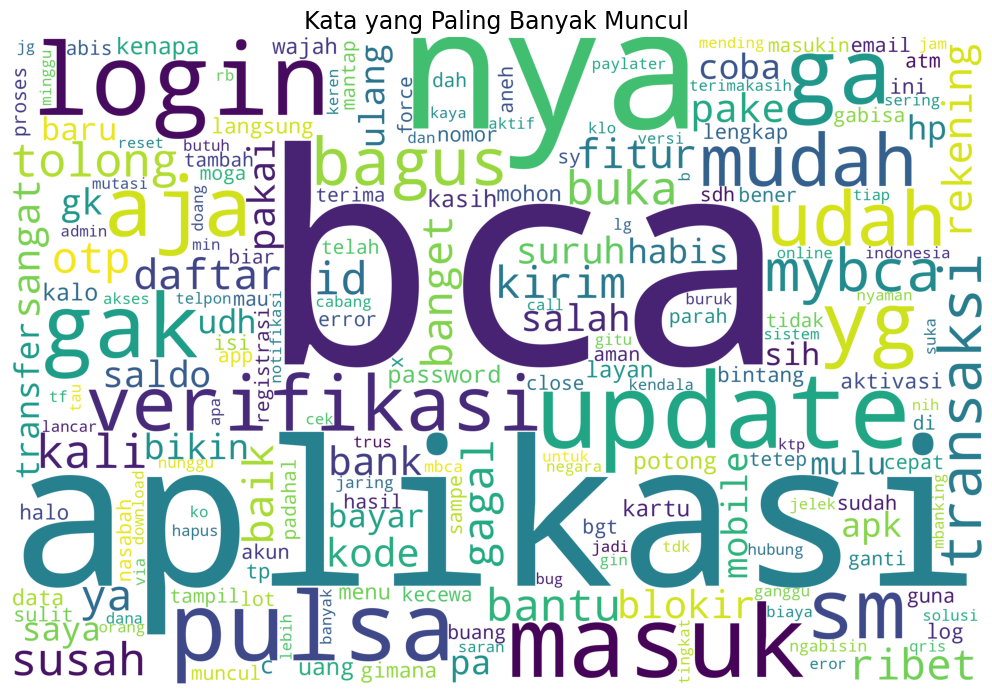

In [16]:
import matplotlib.pyplot
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

df['steming_2'] = df['steming_2'].astype(str)
comment_words = " ".join(cat for cat in df.steming_2)   #content ganti ke steming_2

wordcloud1 = WordCloud(
        width=3000,
        height=2000,
        random_state=1,
        background_color="white",
        collocations=False,
        stopwords=STOPWORDS,
        ).generate(comment_words)

wordcloud1.to_file("wordcloud.png")
plt.figure(figsize = (10,10), facecolor = None)
plt.imshow(wordcloud1)
plt.axis("off")
plt.title("Kata yang Paling Banyak Muncul", fontsize = 17)
plt.tight_layout(pad = 1)

plt.show()

# Feature Extraction

In [17]:

import pickle
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 10000
# Assuming total_data is your list containing data
total_data = [str(item) for item in total_data]

tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("tokenizer.pickle has created!")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle', 'wb') as handle:
    pickle.dump(X, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("x_pad_sequences.pickle has created!")

tokenizer.pickle has created!
x_pad_sequences.pickle has created!


In [18]:
Y = pd.get_dummies(sentiment)
Y = Y.values

with open('y_sentiment.pickle', 'wb') as handle:
    pickle.dump(Y, handle, protocol=pickle.HIGHEST_PROTOCOL)
    print("y_sentiment.pickle has created!")

y_sentiment.pickle has created!


# Splitting Dataset

In [21]:
from sklearn.model_selection import train_test_split

file = open("x_pad_sequences.pickle",'rb')
X = pickle.load(file)
file.close()

file = open("y_sentiment.pickle",'rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#Training

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K
from keras.regularizers import l2

In [22]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.85):
            print("\n Accuracy achieved, training stopped...")
            self.model.stop_training = True

Callback = myCallback()

In [23]:
embed_dim = 200
units = 128

model = Sequential()
model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model.add(LSTM(units, dropout=0.4))
model.add(Dense(5, activation='softmax', kernel_regularizer=l2(0.001)))

adam = optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])
history = model.fit(X_train,
                    y_train,
                    epochs=100,
                    batch_size=64,
                    validation_data=(X_test, y_test),
                    verbose=1,
                    callbacks=[Callback])
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 53s 259ms/step - accuracy: 0.7487 - loss: 0.6335 - val_accuracy: 0.8497 - val_loss: 0.2872
Epoch 2/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 54s 287ms/step - accuracy: 0.8590 - loss: 0.2729 - val_accuracy: 0.8560 - val_loss: 0.2764
Epoch 3/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 75s 248ms/step - accuracy: 0.8942 - loss: 0.2414 - val_accuracy: 0.8630 - val_loss: 0.2839
Epoch 4/100
188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - accuracy: 0.9285 - loss: 0.1872
 Accuracy achieved, training stopped...
188/188 ━━━━━━━━━━━━━━━━━━━━ 46s 245ms/step - accuracy: 0.9285 - loss: 0.1872 - val_accuracy: 0.8570 - val_loss: 0.3043


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 75, 200)        │     2,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 128)            │       168,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,507,281 (24.82 MB)

 Trainable params: 2,169,093 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,338,188 (16.55 MB)

None


#Evaluation

In [24]:
from sklearn import metrics

predictions = model.predict(X_test)
y_pred = predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1), zero_division=0 )
print("Testing selesai")
print(matrix_test)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step
Testing selesai
              precision    recall  f1-score   support

           0       0.46      0.50      0.48       254
           1       0.40      0.43      0.42       297
           2       0.46      0.36      0.40       208
           3       1.00      1.00      1.00      1401
           4       1.00      1.00      1.00       840

    accuracy                           0.86      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.86      0.86      0.86      3000



# Visualization

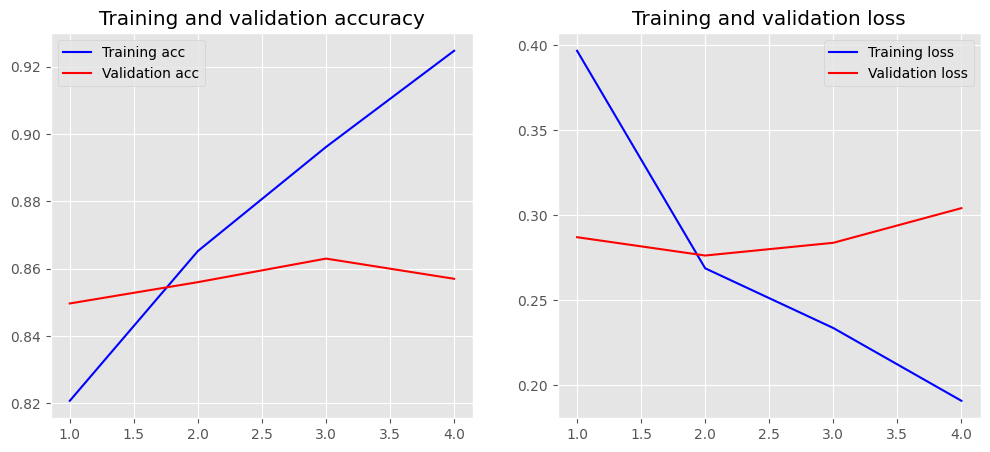

In [25]:
# history.history
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

%matplotlib inline
plot_history(history)

# Cross Validation

In [26]:
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=5,random_state=42,shuffle=True)

accuracies = []

y = Y

embed_dim = 400
units = 400

for iteration, data in enumerate(kf.split(X), start=1):

    data_train   = X[data[0]]
    target_train = y[data[0]]

    data_test    = X[data[1]]
    target_test  = y[data[1]]


    model = Sequential()
    model.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
    model.add(LSTM(units, dropout=0.2))
    model.add(Dense(5 ,activation='softmax'))
    # model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

    adam = optimizers.Adam(learning_rate = 0.001)
    model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

    es = EarlyStopping(monitor='val_loss', mode='min', verbose=0)
    history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=0, callbacks=[es])

    predictions = model.predict(X_test)
    y_pred = predictions

    # for the current fold only
    accuracy = accuracy_score(y_test.argmax(axis=1), y_pred.argmax(axis=1))

    print("Training ke-", iteration)
    print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))
    print("======================================================")

    accuracies.append(accuracy)

# this is the average accuracy over all folds
average_accuracy = np.mean(accuracies)

print()
print()
print()
print("Rata-rata Accuracy: ", average_accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 193ms/step
Training ke- 1
              precision    recall  f1-score   support

           0       0.45      0.40      0.43       254
           1       0.41      0.60      0.49       297
           2       0.51      0.26      0.35       208
           3       1.00      1.00      1.00      1401
           4       1.00      1.00      1.00       840

    accuracy                           0.86      3000
   macro avg       0.68      0.65      0.65      3000
weighted avg       0.86      0.86      0.86      3000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 20s 211ms/step
Training ke- 2
              precision    recall  f1-score   support

           0       0.53      0.28      0.37       254
           1       0.42      0.54      0.47       297
           2       0.42      0.49      0.45       208
           3       1.00      1.00      1.00      1401
           4       1.00      1.00      1.00       840

    accuracy                           0.86      3000
   macro avg       0.67      0.66      0.66      3000
weighted avg       0.86      0.86      0.86      3000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 19s 202ms/step
Training ke- 3
              precision    recall  f1-score   support

           0       0.50      0.40      0.44       254
           1       0.44      0.60      0.51       297
           2       0.46      0.35      0.40       208
           3       1.00      1.00      1.00      1401
           4       1.00      1.00      1.00       840

    accuracy                           0.86      3000
   macro avg       0.68      0.67      0.67      3000
weighted avg       0.87      0.86      0.86      3000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step
Training ke- 4
              precision    recall  f1-score   support

           0       0.44      0.54      0.48       254
           1       0.42      0.36      0.39       297
           2       0.45      0.43      0.44       208
           3       1.00      1.00      1.00      1401
           4       1.00      1.00      1.00       840

    accuracy                           0.86      3000
   macro avg       0.66      0.66      0.66      3000
weighted avg       0.86      0.86      0.86      3000



/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


94/94 ━━━━━━━━━━━━━━━━━━━━ 18s 191ms/step
Training ke- 5
              precision    recall  f1-score   support

           0       0.47      0.50      0.49       254
           1       0.43      0.51      0.46       297
           2       0.49      0.30      0.37       208
           3       1.00      1.00      1.00      1401
           4       1.00      1.00      1.00       840

    accuracy                           0.86      3000
   macro avg       0.68      0.66      0.66      3000
weighted avg       0.86      0.86      0.86      3000




Rata-rata Accuracy:  0.8598666666666667


In [27]:
model.save('sentiment.h5')
print("Model has created!")

Model has created!


# Predict

In [53]:
import re
from keras.models import load_model

input_text = """
buruk
"""

def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-zA-Z0-9]|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', ' ', string)
    string = re.sub(r"\d+", "", string)
    string = re.sub(r'http\S+', '', string)
    string = re.sub('@[^\s]+', '', string)
    string = re.sub(r'#[^\s]+', '', string)
    string = string.encode("ascii", "ignore")
    string = string.decode()
    string = re.sub('\s+',' ', string)
    return string

sentiment = ['very negative','negative','positive' ,'very positive', 'neutral']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model = load_model('sentiment.h5')
prediction = model.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ",text[0])
print("Sentiment: ",sentiment[polarity])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
Text:   buruk 
Sentiment:  very negative


In [54]:
import re
import numpy as np
from keras.models import load_model
from keras.preprocessing.sequence import pad_sequences
import pickle  # jika tokenizer disimpan dalam .pickle

# ======== Load Tokenizer dan Model ==========
with open('tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.load(f)

model = load_model('sentiment.h5')
MAXLEN = 100  # Ganti sesuai X.shape[1] dari training-mu

# ======== Label Sentimen ==========
sentiment_labels = ['very negative','negative','positive' ,'very positive', 'neutral']
# ======== Function Cleansing ==========
def cleansing(sent):
    string = sent.lower()
    string = re.sub(r'[^a-zA-Z0-9]|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?', ' ', string)
    string = re.sub(r"\d+", "", string)
    string = re.sub(r'http\S+', '', string)
    string = re.sub('@[^\s]+', '', string)
    string = re.sub(r'#[^\s]+', '', string)
    string = string.encode("ascii", "ignore").decode()
    string = re.sub('\s+',' ', string)
    return string.strip()

# ======== Field Input ==========
input_text = input("Masukkan teks yang ingin diprediksi sentimennya: ")

# ======== Preprocessing ==========
cleaned_text = cleansing(input_text)
sequence = tokenizer.texts_to_sequences([cleaned_text])
padded = pad_sequences(sequence, maxlen=MAXLEN)

# ======== Prediksi Sentimen ==========
prediction = model.predict(padded)[0]
predicted_label = sentiment_labels[np.argmax(prediction)]

# ======== Output ==========
print(f"\nTeks Dibersihkan: {cleaned_text}")
print("\nProbabilitas Prediksi Sentimen:")
for label, prob in zip(sentiment_labels, prediction):
    print(f"{label:15}: {prob * 100:.2f}%")

print(f"\n👉 Prediksi Sentimen: {predicted_label}")


Masukkan teks yang ingin diprediksi sentimennya: sungguh bagus
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step

Teks Dibersihkan: sungguh bagus

Probabilitas Prediksi Sentimen:
very negative  : 11.73%
negative       : 8.60%
positive       : 77.52%
very positive  : 0.51%
neutral        : 1.63%

👉 Prediksi Sentimen: positive
